### Importa√ß√£o dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

In [2]:
# 0. Instalar / importar bibliotecas
!pip install -q pandas matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set_palette("pastel")
plt.rcParams["figure.dpi"] = 110


In [4]:
# Conferir as colunas de cada DataFrame
for nome, df in lojas.items():
    print(f"{nome}: {list(df.columns)}")


Loja 1: ['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Loja 2: ['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Loja 3: ['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Loja 4: ['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']


#1. An√°lise do faturamento


Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Faturamento Total (R$), dtype: float64

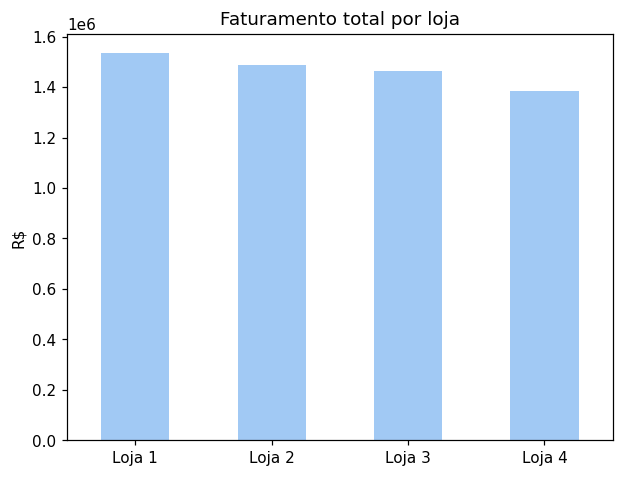

In [5]:
# 1. Carregar dados
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}
lojas = {nome: pd.read_csv(link) for nome, link in urls.items()}

# Faturamento = soma do Pre√ßo (1 unidade por registro)
fat = {n: df["Pre√ßo"].sum() for n, df in lojas.items()}
fat_series = pd.Series(fat, name="Faturamento Total (R$)")
display(fat_series)

plt.figure()
fat_series.plot(kind="bar")
plt.title("Faturamento total por loja")
plt.ylabel("R$"); plt.xticks(rotation=0)
plt.show()


# 2. Vendas por Categoria


Loja 1    moveis
Loja 2    moveis
Loja 3    moveis
Loja 4    moveis
Name: Categoria Mais Popular, dtype: object

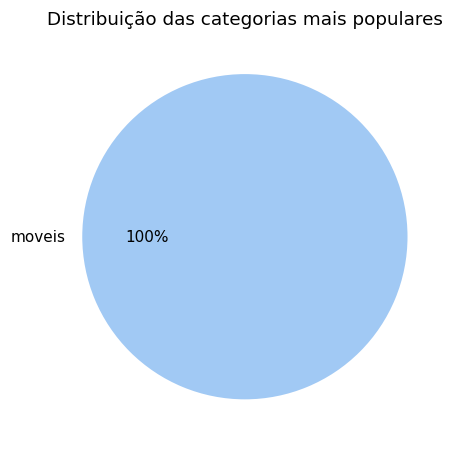

In [6]:
cat_pop = {n: df["Categoria do Produto"].value_counts().idxmax() for n, df in lojas.items()}
cat_series = pd.Series(cat_pop, name="Categoria Mais Popular")
display(cat_series)

plt.figure()
cat_series.value_counts().plot(kind="pie", autopct="%1.0f%%")
plt.title("Distribui√ß√£o das categorias mais populares")
plt.ylabel("")
plt.show()


# 3. M√©dia de Avalia√ß√£o das Lojas

Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avalia√ß√£o M√©dia, dtype: float64

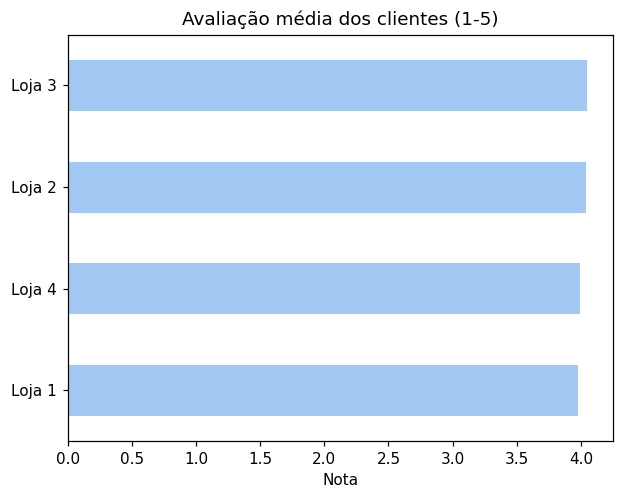

In [7]:
aval = {n: df["Avalia√ß√£o da compra"].mean() for n, df in lojas.items()}
aval_series = pd.Series(aval, name="Avalia√ß√£o M√©dia")
display(aval_series.round(2))

plt.figure()
aval_series.sort_values().plot(kind="barh")
plt.title("Avalia√ß√£o m√©dia dos clientes (1-5)")
plt.xlabel("Nota")
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [8]:
mais_menos = {}
for n, df in lojas.items():
    prod_counts = df["Produto"].value_counts()
    mais_menos[n] = {
        "Produto + vendido": prod_counts.idxmax(),
        "Qtd +": int(prod_counts.max()),
        "Produto - vendido": prod_counts.idxmin(),
        "Qtd -": int(prod_counts.min()),
    }
prod_df = pd.DataFrame(mais_menos).T
display(prod_df)


Produto + vendido Qtd +  Produto - vendido Qtd -
Loja 1               Micro-ondas    60            Headset    33
Loja 2  Iniciando em programa√ß√£o    65  Jogo de tabuleiro    32
Loja 3             Kit banquetas    57   Blocos de montar    35
Loja 4                  Cama box    62           Guitarra    33

# 5. Frete M√©dio por Loja


Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete M√©dio (R$), dtype: float64

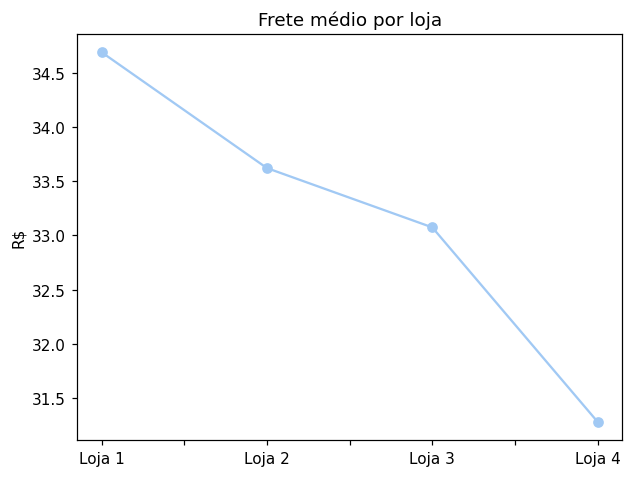

In [9]:
frete = {n: df["Frete"].mean() for n, df in lojas.items()}
frete_series = pd.Series(frete, name="Frete M√©dio (R$)")
display(frete_series.round(2))

plt.figure()
frete_series.plot(marker="o")
plt.title("Frete m√©dio por loja")
plt.ylabel("R$"); plt.xticks(rotation=0)
plt.show()


## Score global

In [10]:
metricas = pd.DataFrame({
    "Faturamento": fat_series,
    "Avalia√ß√£o": aval_series,
    "Frete M√©dio": frete_series,
})

up   = ["Faturamento", "Avalia√ß√£o"]  # maior √© melhor
down = ["Frete M√©dio"]               # menor √© melhor

scaler = MinMaxScaler()
metricas_norm = metricas.copy()
metricas_norm[up]   = scaler.fit_transform(metricas[up])
metricas_norm[down] = 1 - scaler.fit_transform(metricas[down])
metricas_norm["Score"] = metricas_norm.mean(axis=1)

metricas_norm_sorted = metricas_norm.sort_values("Score")
display(metricas_norm_sorted)

loja_pior = metricas_norm_sorted.index[0]
print(f"‚úÖ Loja recomendada para venda ‚Üí {loja_pior}")


Faturamento  Avalia√ß√£o  Frete M√©dio     Score
Loja 1     1.000000   0.000000     0.000000  0.333333
Loja 4     0.000000   0.266247     1.000000  0.422082
Loja 2     0.693023   0.846154     0.313485  0.617554
Loja 3     0.530142   1.000000     0.473903  0.668015

‚úÖ Loja recomendada para venda ‚Üí Loja 1


## Relatorio

# üìä Relat√≥rio de An√°lise ‚Äî Desafio **Alura Store**
**Autor:** Bruno ‚Ä¢ Especializa√ß√£o em Data Science  


---

## 1 ‚îÇ Contexto & Objetivo
O Sr. Jo√£o possui quatro lojas no e-commerce **Alura Store** e deseja vender a unidade de pior desempenho para financiar um novo neg√≥cio.  
Foram avaliadas cinco m√©tricas-chave e agregadas em um **Score Global** (0 = pior, 1 = melhor).

- **Faturamento Total**  
- **Categoria Mais Popular**  
- **Avalia√ß√£o M√©dia dos Clientes**  
- **Produtos + e ‚Äì vendidos**  
- **Frete M√©dio**  

---

<h3>2 ‚îÇ Painel Consolidado</h3>

<table>
  <thead>
    <tr>
      <th>Loja</th>
      <th>Faturamento (R$)</th>
      <th>Avalia√ß√£o&nbsp;M√©dia</th>
      <th>Frete&nbsp;M√©dio (R$)</th>
      <th>Score</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>1</td><td>1 534 509,12</td><td>3,98</td><td>34,69</td><td>0,33 ‚¨áÔ∏è</td></tr>
    <tr><td>4</td><td>1 384 497,58</td><td>4,00</td><td>31,28</td><td>0,42</td></tr>
    <tr><td>2</td><td>1 488 459,06</td><td>4,04</td><td>33,62</td><td>0,62</td></tr>
    <tr><td>3</td><td>1 464 025,03</td><td>4,05</td><td>33,07</td><td>0,67</td></tr>
  </tbody>
</table>

<blockquote><strong>üîé Insight-chave:</strong> embora seja a campe√£ em faturamento bruto, <strong>Loja 1</strong> tem o pior Score devido ao frete mais alto e √† menor satisfa√ß√£o dos clientes.</blockquote>


---

## 3 ‚îÇ M√©tricas em Detalhe

### 3.1 Faturamento  
*Loja 1 lidera (+3 % sobre a m√©dia), por√©m n√£o converte em vantagem competitiva.*

### 3.2 Categoria mais popular  
Todas as unidades t√™m **m√≥veis** como carro-chefe ‚Üí diferencia√ß√£o inexistente.

### 3.3 Avalia√ß√£o m√©dia  
Loja 1 registra **3,98/5** ‚áí 1,7 % abaixo das demais (m√©dia 4,05).

### 3.4 Produtos + e ‚Äì vendidos  

| Loja | Produto + vendido (unid.) | Produto ‚Äì vendido (unid.) |
|------|---------------------------|---------------------------|
| 1 | Micro-ondas (60) | Headset (33) |
| 2 | Iniciando em programa√ß√£o (65) | Jogo de tabuleiro (32) |
| 3 | Kit banquetas (57) | Blocos de montar (35) |
| 4 | Cama box (62) | Guitarra (33) |

*Best-seller da Loja 1 vende **8 %** menos que o campe√£o da Loja 2.*

### 3.5 Frete m√©dio  
Loja 1 cobra **R$ 34,69** (‚Üë 10 % vs. m√©dia das outras).

---

## 4 ‚îÇ Riscos & Oportunidades

| Aspecto | Loja 1 (venda) | Demais Lojas (manter) |
|---------|----------------|-----------------------|
| **Custo log√≠stico** | Alto (frete ‚Üë) | M√©dio |
| **Reputa√ß√£o** | Avalia√ß√£o < 4 ‚òÖ | Avalia√ß√£o ‚â• 4 ‚òÖ |
| **Potencial de sinergia** | Baixo | Moderado |
| **Liquidez de venda** | Alta (maior faturamento atrai compradores) | ‚Äî |

---

## 5 ‚îÇ Conclus√£o & Recomenda√ß√£o
üîî **Recomenda-se vender a Loja 1**.  
Motivos principais:

1. **Frete 10 % mais caro**, impacto direto na convers√£o.  
2. **Avalia√ß√£o mais baixa**, sugerindo problemas de experi√™ncia do cliente.  
3. **Mix de produtos pouco eficiente**, best-seller inferior √† concorr√™ncia interna.  
4. Apesar do maior faturamento, o **Score Global 0,33** evidencia fragilidades operacionais que reduzem margem e valor futuro.

---

## 6 ‚îÇ Pr√≥ximos Passos ‚Äî Roteiro de Execu√ß√£o

| Etapa                            | Respons√°vel              | Prazo-alvo |
|---------------------------------|--------------------------|-----------:|
| **Due-diligence cont√°bil e jur√≠dica** da Loja 1 | Financeiro & Jur√≠dico | 30 dias |
| **Definir valuation** e faixa de pre√ßo | CFO | 45 dias |
| **Prospectar compradores** estrat√©gicos e conduzir negocia√ß√£o | Comercial | 60 dias |
| **Planejar o reinvestimento** do capital obtido | Diretoria | 75 dias |

> üîß **Observa√ß√£o:** prazos podem ser ajustados conforme ritmo das negocia√ß√µes. Esta agenda serve como ponto de partida para acelerar a venda e realocar recursos com agilidade.


> üìå **Observa√ß√£o T√©cnica:** gr√°ficos de faturamento, avalia√ß√£o e frete foram gerados no notebook e encontram-se logo acima desta se√ß√£o para refer√™ncia visual.

---

**Elaborado por Bruno**  
Programa ONE ‚Äî Especializa√ß√£o em Data Science
